['serving_default']
The image is predicted to be: With Mask


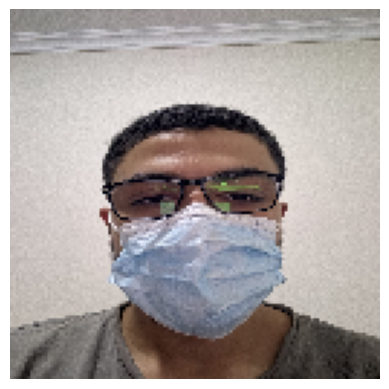

The image is predicted to be: Without Mask


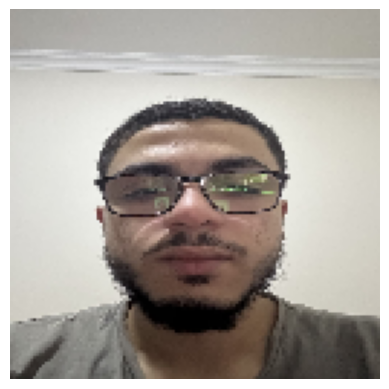

In [13]:
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Specify the path to the directory containing the saved_model.pb file
model_dir = '/content/model/'

# Load the model
model = tf.saved_model.load(model_dir)

# To see the signatures
print(list(model.signatures.keys()))

# Example: using the 'serving_default' signature to make predictions
infer = model.signatures['serving_default']

def load_and_preprocess_image(img_path):
    """Load and preprocess image for prediction."""
    img = image.load_img(img_path, target_size=(128, 128))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)  # Add batch dimension
    img_tensor /= 255.0  # Normalize to [0, 1] range
    return img_tensor

def predict_image(img_path, model):
    """Predict the class of the image using the loaded model."""
    img_tensor = load_and_preprocess_image(img_path)
    predictions = infer(tf.constant(img_tensor))
    return predictions

# Example image path
img_path = '/mask.jpg'  # Replace with your image path

# Make predictions
predictions = predict_image(img_path, model)

# Class labels
class_labels = ['With Mask', 'Without Mask']

# Get the predicted class
predicted_class_index = np.argmax(predictions['dense_1'].numpy(), axis=1)[0]
predicted_class = class_labels[predicted_class_index]

# Print the result
print(f'The image is predicted to be: {predicted_class}')

# Display the image
img_display = image.load_img(img_path, target_size=(128, 128))
plt.imshow(img_display)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


# Example image path
img_path = '/IMG_9669.jpg'  # Replace with your image path

# Make predictions
predictions = predict_image(img_path, model)

# Class labels
class_labels = ['With Mask', 'Without Mask']

# Get the predicted class
predicted_class_index = np.argmax(predictions['dense_1'].numpy(), axis=1)[0]
predicted_class = class_labels[predicted_class_index]

# Print the result
print(f'The image is predicted to be: {predicted_class}')

# Display the image
img_display = image.load_img(img_path, target_size=(128, 128))
plt.imshow(img_display)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

